In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf 

data collecting

In [2]:
import datetime 
symbol='APPL'
rawdata = yf.download(symbol,end = datetime.today(), period='max', interval='1d')

AttributeError: module 'datetime' has no attribute 'today'

In [3]:
rawdata=pd.read_csv('C:\\Users\\kevin\\Desktop\\appl.csv')

In [4]:
rawdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100266,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095035,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088059,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090239,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092855,73449600


data description

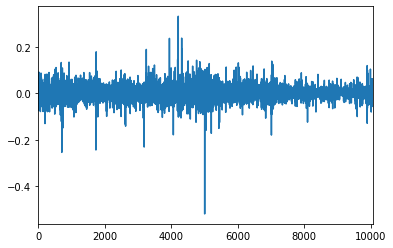

In [5]:
rets=rawdata['Close'].pct_change()
rets.plot()

In [6]:
rets.head()

0         NaN
1   -0.052174
2   -0.073394
3    0.024752
4    0.028986
Name: Close, dtype: float64

Text(0.5, 1.0, 'APPL')

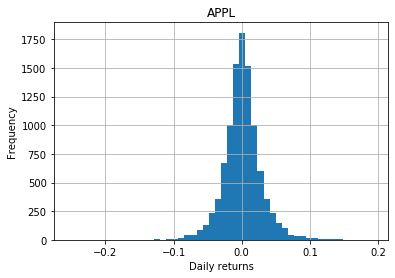

In [7]:
rets[(rets>=-0.3) & (rets<=0.2)].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Daily returns')
plt.title('APPL')

In [8]:
#拟合正态分布

tradings strategies

In [9]:
price=rawdata['Close']

In [10]:
st=30 
lt=180 
mavgs=price.rolling(st).mean()
mavgl=price.rolling(lt).mean()

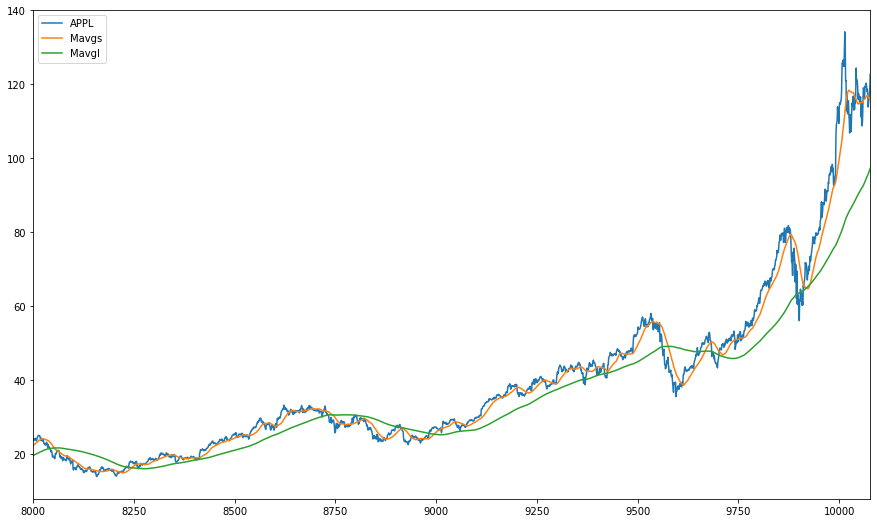

In [11]:
data=pd.DataFrame()
data['APPL']=price
data['Mavgs']=mavgs
data['Mavgl']=mavgl
data=data[8000:]
data.plot(figsize=(15,9))

In [12]:
data.isna().sum()

APPL     0
Mavgs    0
Mavgl    0
dtype: int64

In [13]:
#data.dropna(inplace=True)

In [14]:
data['position']=np.where(data['Mavgs']>data['Mavgl'],1,-1)

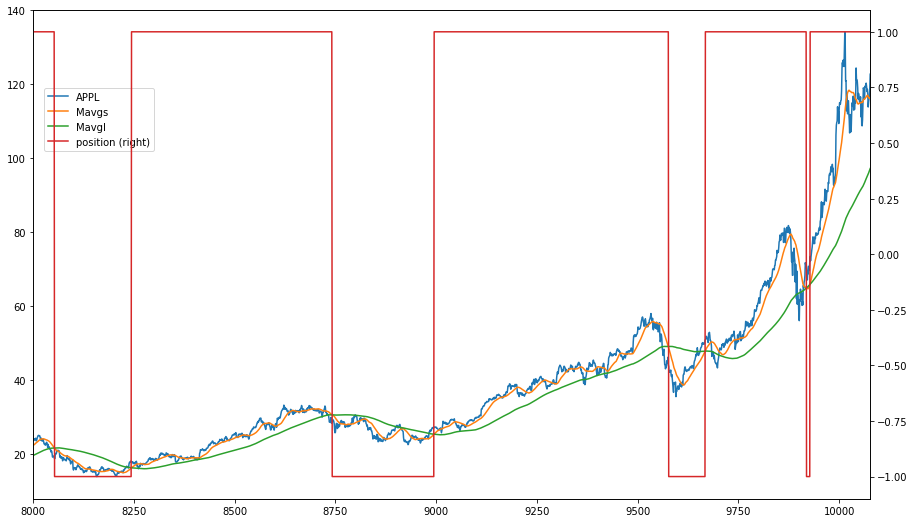

In [39]:
ax=data.plot(secondary_y='position',figsize=(15,9))
ax.get_legend().set_bbox_to_anchor((0.15,0.85))

Estimate of performance

In [44]:
data['returns']=np.log(data.APPL/data.APPL.shift(1))
data.head().round(4)
data.dropna(inplace=True)

In [45]:
data.head()

,APPL,Mavgs,Mavgl,position,returns
8001,23.709642,22.460262,19.704754,1,-0.014357
8002,23.758572,22.532810,19.761311,1,0.002062
8003,24.106071,22.617500,19.820048,1,0.014520
8004,23.936787,22.700012,19.877431,1,-0.007047
8005,24.152500,22.820607,19.935776,1,0.008971


In [50]:
data.tail()

,APPL,Mavgs,Mavgl,position,returns
10073,115.169998,116.465000,95.998416,1,0.011528
10074,116.029999,116.293000,96.298264,1,0.007439
10075,116.589996,116.155666,96.559916,1,0.004815
10076,119.050003,116.156667,96.884902,1,0.020880
10077,122.720001,116.381333,97.215486,1,0.030362


In [48]:
data.returns.sum()

1.6296664158286505

In [65]:
data['strategy']=data['position']*data['returns']

In [66]:
data[['strategy','returns']].std()

strategy    0.018198
returns     0.018197
dtype: float64

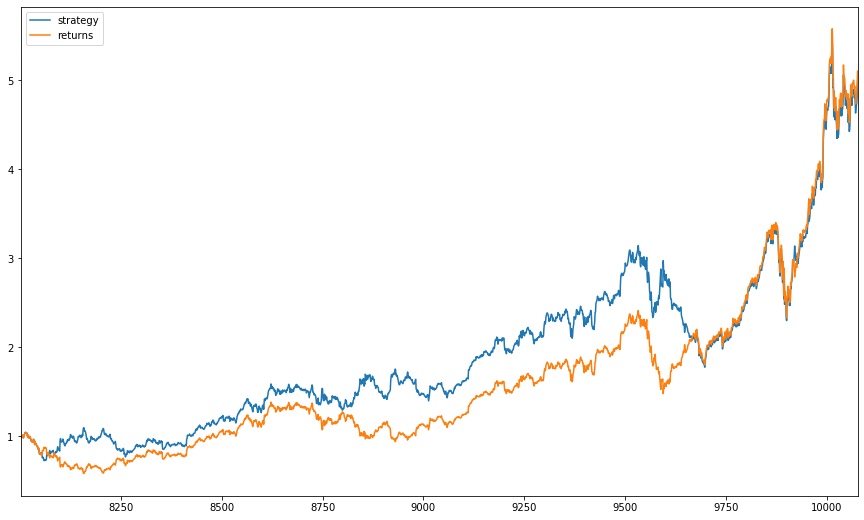

In [67]:
ax=data[['strategy','returns']].cumsum().apply(np.exp).plot(figsize=(15,9))